

---



**CALLING THE DATASET**

In [ ]:
import pandas as pd
df = pd.read_csv('apple-twitter-sentiment-texts.csv')

In [ ]:
df.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [ ]:
df=df.replace({'sentiment':{-1: 'negative', 0:'neutral', 1:'positive'}})

In [ ]:
df

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,negative
1,What Happened To Apple Inc? http://t.co/FJEX...,neutral
2,Thank u @apple I can now compile all of the pi...,positive
3,The oddly uplifting story of the Apple co-foun...,neutral
4,@apple can i exchange my iphone for a differen...,neutral
...,...,...
1625,Those** PICK UP THE SLACK YOU FUCK BOYS @Apple,negative
1626,Finally got my iPhone 6 in the mail and it com...,negative
1627,@umo_games @Apple ended up getting a new compu...,neutral
1628,The 19-Year-Old #WizKid Who Turned Down @Apple...,neutral


**ONE HOT ENCODING**

In [ ]:
category = pd.get_dummies(df.sentiment)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='sentiment')

In [ ]:
df_baru

,text,negative,neutral,positive
0,Wow. Yall needa step it up @Apple RT @heynyla:...,1,0,0
1,What Happened To Apple Inc? http://t.co/FJEX...,0,1,0
2,Thank u @apple I can now compile all of the pi...,0,0,1
3,The oddly uplifting story of the Apple co-foun...,0,1,0
4,@apple can i exchange my iphone for a differen...,0,1,0
...,...,...,...,...
1625,Those** PICK UP THE SLACK YOU FUCK BOYS @Apple,1,0,0
1626,Finally got my iPhone 6 in the mail and it com...,1,0,0
1627,@umo_games @Apple ended up getting a new compu...,0,1,0
1628,The 19-Year-Old #WizKid Who Turned Down @Apple...,0,1,0


In [ ]:
tweet = df_baru['text'].values
label = df_baru[['negative', 'neutral', 'positive']].values

**SPLITTING INTO TRAINING SET AND VALIDATION SET**

In [ ]:
from sklearn.model_selection import train_test_split
tweet_train, tweet_test, label_train, label_test = train_test_split(tweet, label, test_size=0.2)

**TOKENIZER FUNCTION**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(tweet_train) 
tokenizer.fit_on_texts(tweet_test)

In [ ]:
sekuens_train = tokenizer.texts_to_sequences(tweet_train)
sekuens_test = tokenizer.texts_to_sequences(tweet_test)

In [ ]:
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

**MODEL SEQUENTIAL**

*With Embedding Layer*

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

*Callback Function*

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.80): 
      print("\nWe have reached %2.2f%% accuracy, so we will stop training." %(0.80*100))
      self.model.stop_training = True

callbacks = Callback()

**TRAINING MODEL**

In [ ]:
num_epochs = 40
history = model.fit(padded_train, label_train, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2,callbacks=[callbacks])

Epoch 1/40
41/41 - 4s - loss: 0.9736 - accuracy: 0.4962 - val_loss: 0.9340 - val_accuracy: 0.7147
Epoch 2/40
41/41 - 1s - loss: 0.7746 - accuracy: 0.7508 - val_loss: 0.6399 - val_accuracy: 0.7699
Epoch 3/40
41/41 - 1s - loss: 0.5414 - accuracy: 0.7968 - val_loss: 0.6156 - val_accuracy: 0.7822
Epoch 4/40
41/41 - 1s - loss: 0.3511 - accuracy: 0.8758 - val_loss: 0.6174 - val_accuracy: 0.7822

We have reached 80.00% accuracy, so we will stop training.


**PLOT**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

*Accuration Plot*

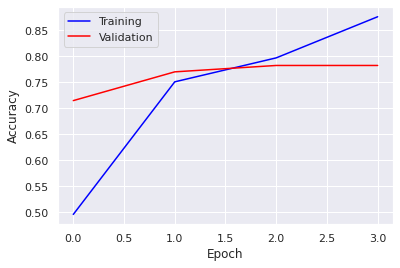

In [ ]:
# Create a color palette
sns.set_theme(style="darkgrid")

plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'], label='Training', color='blue')
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'], label='Validation', color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

*Loss Plot*

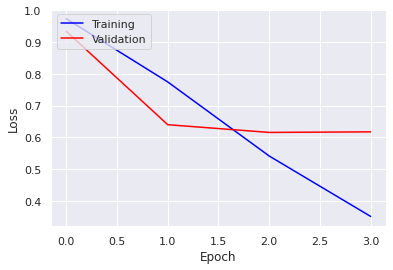

In [ ]:
# Create a color palette
sns.set_theme(style="darkgrid")

plt.plot(range(len(history.history['loss'])),history.history['loss'], label='Training', color='blue')
plt.plot(range(len(history.history['val_loss'])),history.history['val_loss'], label='Validation', color='red')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()